In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("insurance.csv")
df=data.copy()

In [3]:
df.shape

(1338, 7)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Smoker distribution
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [7]:
# # Checking Null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

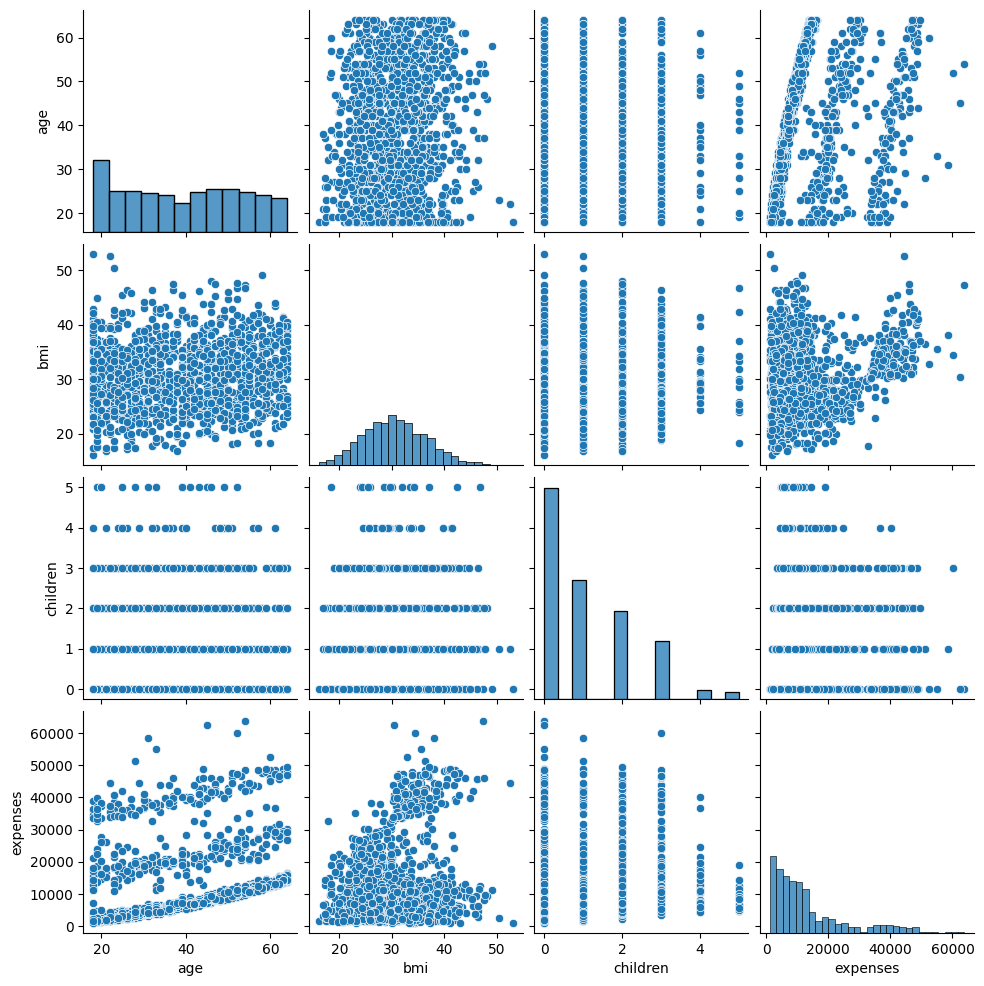

In [8]:
sns.pairplot(df)

In [9]:
dv=df[['age','bmi','expenses']]
dv.corr()

,age,bmi,expenses
age,1.000000,0.109341,0.299008
bmi,0.109341,1.000000,0.198576
expenses,0.299008,0.198576,1.000000


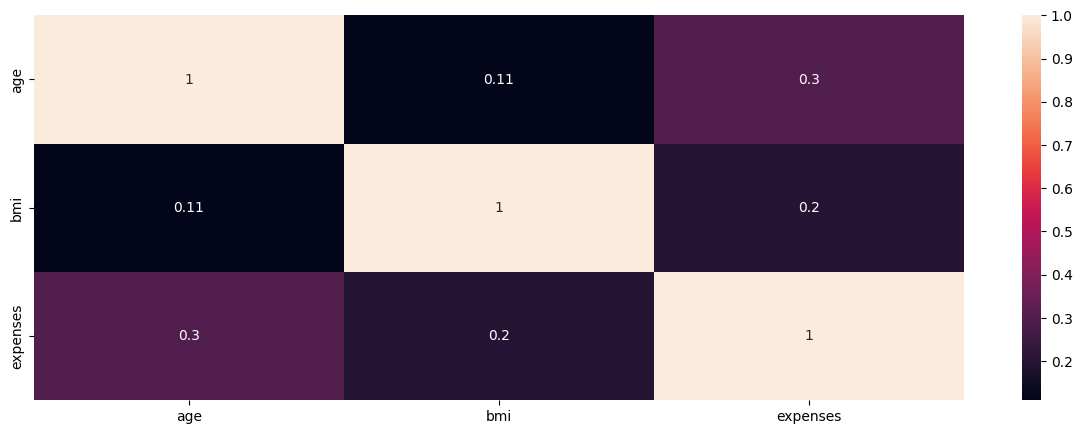

In [10]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(dv.corr(),annot=True)
plt.show()

In [11]:
df['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [12]:
df['sex']=df['sex'].map({'female':0, 'male':1})
df['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [13]:
df['smoker'] = df['smoker'].map({'no':0, 'yes':1})
df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [14]:
df['region']=df['region'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   int64   
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   int64   
 5   region    1338 non-null   category
 6   expenses  1338 non-null   float64 
dtypes: category(1), float64(2), int64(4)
memory usage: 64.4 KB


In [16]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [17]:
df['region'].value_counts()

region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64

In [18]:
# # If we do this we don't need to do concat
# data = pd.get_dummies(data, columns=['region'], drop_first=True)

# print("Preprocessing done!")
# data.head()

In [19]:
region = pd.get_dummies(df['region'], drop_first=True)
region

,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False
...,...,...,...
1333,True,False,False
1334,False,False,False
1335,False,True,False
1336,False,False,True


In [20]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [21]:
df = pd.concat([df, region], axis = 1)
df

,age,sex,bmi,children,smoker,region,expenses,northwest,southeast,southwest
0,19,0,27.9,0,1,southwest,16884.92,False,False,True
1,18,1,33.8,1,0,southeast,1725.55,False,True,False
2,28,1,33.0,3,0,southeast,4449.46,False,True,False
3,33,1,22.7,0,0,northwest,21984.47,True,False,False
4,32,1,28.9,0,0,northwest,3866.86,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,northwest,10600.55,True,False,False
1334,18,0,31.9,0,0,northeast,2205.98,False,False,False
1335,18,0,36.9,0,0,southeast,1629.83,False,True,False
1336,21,0,25.8,0,0,southwest,2007.95,False,False,True


In [22]:
df=df.drop(['region'], axis=1)
df.head()

,age,sex,bmi,children,smoker,expenses,northwest,southeast,southwest
0,19,0,27.9,0,1,16884.92,False,False,True
1,18,1,33.8,1,0,1725.55,False,True,False
2,28,1,33.0,3,0,4449.46,False,True,False
3,33,1,22.7,0,0,21984.47,True,False,False
4,32,1,28.9,0,0,3866.86,True,False,False


In [23]:
# Machine test

In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
### Why Polynomial Regression + StandardScaler (not SVR)?

# - Polynomial Regression gave the **highest R² score (≈0.90)** on this dataset.
# - SVR performs slightly worse and is more complex.
# - StandardScaler was used as **best practice** (helps training stability and allows easy comparison with distance-based models like SVR/KNN if needed).
# - Scaling is **mandatory** for SVR/KNN/SVM, but **recommended** for Linear/Polynomial Regression.

In [26]:
X_r = df.drop(['expenses'], axis=1)
y_r = df['expenses']

# Split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

# Scale features (keep feature names)
scaler = StandardScaler()

# Fit ONLY on training data (DataFrame)
scaler.fit(X_train_r)

# Transform after fitting
X_train_scaled_r = scaler.transform(X_train_r)
X_test_scaled_r = scaler.transform(X_test_r)

In [27]:
# Polynomial Regression (Degree 2)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled_r)
X_test_poly = poly.transform(X_test_scaled_r)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_r)

# Predictions
y_pred_poly = poly_model.predict(X_test_poly)

In [28]:
print("POLYNOMIAL REGRESSION RESULTS")
print(f"R2 {r2_score(y_test_r, y_pred_poly):.4f}")
print(f"MAE: {mean_absolute_error(y_test_r, y_pred_poly):.2f}")

POLYNOMIAL REGRESSION RESULTS
R2 0.8667
MAE: 2729.98


In [29]:
# Test accuracy for Polynomial Regression (same format as salary project)
poly_train_score = poly_model.score(X_train_poly, y_train_r) * 100
poly_test_score = r2_score(y_test_r, y_pred_poly) * 100

print(f"Polynomial regression (Training) = {poly_train_score:.5f}")
print(f"Polynomial regression (Test) = {poly_test_score:.5f}")

Polynomial regression (Training) = 84.18812
Polynomial regression (Test) = 86.66533


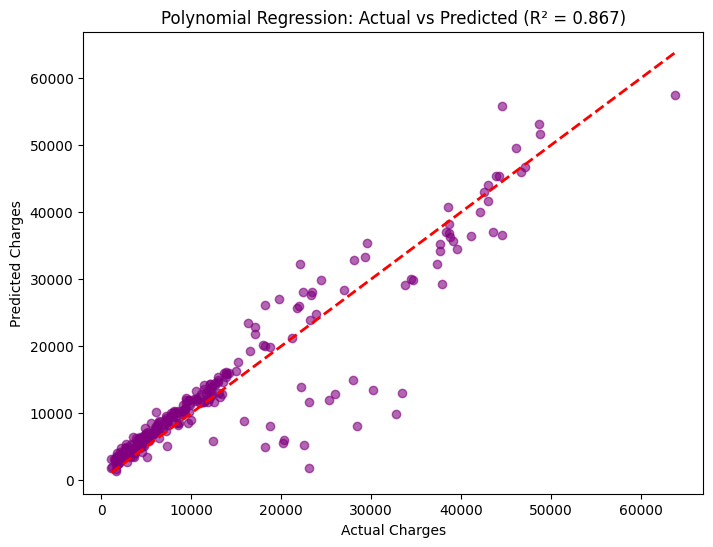

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_r, y_pred_poly, alpha=0.6, color='purple')
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title(f'Polynomial Regression: Actual vs Predicted (R² = {r2_score(y_test_r, y_pred_poly):.3f})')
plt.show()

In [31]:
import pickle

# Save the complete pipeline: scaler + poly features + model
insurance_model_package = {
    'scaler': scaler,                    # StandardScaler (fitted)
    'poly_features': poly,               # PolynomialFeatures(degree=2, fitted)
    'model': poly_model,                 # Trained LinearRegression
    'expected_columns': ['age', 'bmi', 'children',
                         'sex', 'smoker',
                         'northwest', 'southeast', 'southwest']
}

# Save to a single file
with open('insurance_model.pickle', 'wb') as f:
    pickle.dump(insurance_model_package, f)

print("Model package saved successfully as 'insurance_model.pickle'")

Model package saved successfully as 'insurance_model.pickle'


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   expenses   1338 non-null   float64
 6   northwest  1338 non-null   bool   
 7   southeast  1338 non-null   bool   
 8   southwest  1338 non-null   bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 66.8 KB


In [33]:
df['bmi'].max()

np.float64(53.1)

In [34]:
df['smoker'].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

In [35]:
df.head()

,age,sex,bmi,children,smoker,expenses,northwest,southeast,southwest
0,19,0,27.9,0,1,16884.92,False,False,True
1,18,1,33.8,1,0,1725.55,False,True,False
2,28,1,33.0,3,0,4449.46,False,True,False
3,33,1,22.7,0,0,21984.47,True,False,False
4,32,1,28.9,0,0,3866.86,True,False,False
